In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
ya = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
yp = [0, 0, 0, 1, 1, 0, 0, 1, 1, 1]

-| Prediksi 0 | Prediksi 1
-|-|-
__Aktual 0__ | 3 | 2
__Aktual 1__ | 2 | 3  

In [3]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ya,yp)
cm

array([[3, 2],
       [2, 3]], dtype=int64)

In [4]:
dfCon = pd.DataFrame(cm, columns=['Pred 0', 'Pred 1'],
                         index = ['Actual 0', 'Actual 1'])
dfCon

,Pred 0,Pred 1
Actual 0,3,2
Actual 1,2,3


(2, -0.05)

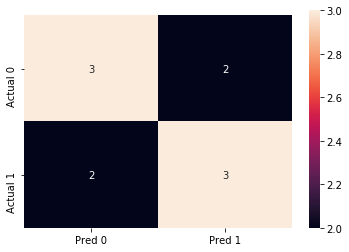

In [5]:
#plot confusion matrix 
sb.heatmap(dfCon, annot=True, fmt='d')
plt.ylim(2,-0.05)

In [6]:
from sklearn.linear_model import LogisticRegression

x = np.arange(1,11)
y = np.array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

lr = LogisticRegression(solver='lbfgs')
lr.fit(x.reshape(-1,1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
#prediksi
yp = lr.predict(x.reshape(-1,1))
yp

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

-| Prediksi 0 | Prediksi 1
-| - | -
__Aktual 0__ | 5 | 1
__Aktual 1__ | 1 | 3  

In [8]:
cm = confusion_matrix(y, yp, labels=[0,1])
cm

array([[5, 1],
       [1, 3]], dtype=int64)

In [9]:
dfSample = pd.DataFrame(cm, columns=['Pred 0', 'Pred 1'], index=['Act 0', 'Act 1'])
dfSample

,Pred 0,Pred 1
Act 0,5,1
Act 1,1,3


In [10]:
from sklearn.metrics import plot_confusion_matrix as pcm

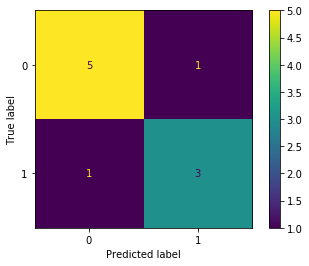

In [11]:
pcm(lr, x.reshape(-1,1), y)

### Evaluation Metrics from Confusion Matrix
- __True__ -> y predict = y actual
- __False__ -> y predict != y actual
- __Positive__ -> y predict = 1
- __Negative__ -> y predict = 0

- __True Positive (TP)__ -> Predict is right, y predict = 1 -> 3
- __True Negative (TN)__ -> Predict is right, y predict = 0 -> 5
- __False Positive (FP)__ -> Predict is wrong, y predict = 1 -> 1
- __False Negative (FN)__ -> Predict is wrong, y predict = 0 -> 1

In [12]:
tn, fp, fn, tp = confusion_matrix(y, yp).ravel()
tn, fp, fn, tp

(5, 1, 1, 3)

In [13]:
print(y)
print(yp)

[0 0 0 0 1 0 1 0 1 1]
[0 0 0 0 0 0 1 1 1 1]


In [59]:
print('1. Akurasi', ((tp+tn)/len(y))*100, '%')
print('2. Error Rate', ((fp+fn)/len(y))*100, '%')
print('3. TP Rate', tp/(tp+fn)*100, '%')
print('4, FP Rate', fp/(fp+tn)*100, '%')
print('5. TN Rate', tn/(tn+fp)*100, '%')
print('6. FN Rate', fn/(fn+tp)*100, '%')
print('7. Precision (+)', tp/(tp+fp)*100, '%')
print('8. Prevalence', (tp+fn)/len(y)*100, '%')
print('9. Null Error', (fp+tn)/len(y)*100, '%')
print('10. F1 Score', 2*(0.75*0.75)/(0.75+0.75)*100, '%')
print('11. Balanced Accuracy', (0.75+0.83)/2*100, '%')
print('12. Precesion (-)', tn/(tf+fn)*100, '%')

1. Akurasi 70.0 %
2. Error Rate 30.0 %
3. TP Rate 70.0 %
4, FP Rate 30.0 %
5. TN Rate 70.0 %
6. FN Rate 30.0 %
7. Precision (+) 70.0 %
8. Prevalence 50.0 %
9. Null Error 50.0 %
10. F1 Score 75.0 %
11. Balanced Accuracy 79.0 %
12. Precesion (-) 116.66666666666667 %


### Evaluation Confusion Matrix using SKLEARN

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score, f1_score, classification_report

In [18]:
print(f'Accuracy: {accuracy_score(y, yp)}')
print(f'Error Rate: {round(1 - accuracy_score(y, yp),2)}')
print(f'Recall (+): {recall_score(y, yp)}')
print(f'Precision Score (+): {precision_score(y,yp)}')
print(f'F1 Score: {f1_score(y, yp)}')
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y, yp)}')

Accuracy: 0.8
Error Rate: 0.2
Recall (+): 0.75
Precision Score (+): 0.75
F1 Score: 0.75
Balanced Accuracy Score: 0.7916666666666667


In [19]:
print(classification_report(y, yp, labels=[0,1]))

precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [27]:
data = {
    'x': np.arange(1,21),
    'y': np.array(['Inats','Inats','Inats','Inats','Inats',
                    'Inats','Yupi','Inats','Yupi','Yupi',
                    'Inats','Inats','Yupi','Inats','Yupi',
                    'Yupi','Yupi','Yupi','Yupi','Yupi'])
}
df = pd.DataFrame(data)
df

,x,y
0,1,Inats
1,2,Inats
2,3,Inats
3,4,Inats
4,5,Inats
5,6,Inats
6,7,Yupi
7,8,Inats
8,9,Yupi
9,10,Yupi


In [45]:
modelR = LogisticRegression(solver='lbfgs')
modelR.fit(df[['x']], df['y'])
yp = modelR.predict(df[['x']]).tolist()
y = df['y'].tolist()
df['yp'] = yp
print(y)
print(yp)

['Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Yupi', 'Inats', 'Yupi', 'Yupi', 'Inats', 'Inats', 'Yupi', 'Inats', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi']
['Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Inats', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi', 'Yupi']


In [46]:
cm_c = confusion_matrix(y, yp).ravel()
cm_c

array([7, 3, 3, 7], dtype=int64)

In [55]:
tn = cm_c[0]
fp = cm_c[1]
fn = cm_c[2]
tp = cm_c[3]
tn, fp, fn, tp

(7, 3, 3, 7)

In [89]:
tp_manual = df[df['y'] == 'Yupi'][df['yp'] == 'Yupi'].count()
tn_manual = df[df['y'] == 'Inats'][df['yp'] == 'Inats'].count()
fn_manual = df[df['y'] == 'Yupi'][df['yp'] == 'Inats'].count()
fp_manual = df[df['y'] == 'Inats'][df['yp'] == 'Yupi'].count()
tp_manual, tn_manual, fn_manual, fp_manual

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(x     7
 y     7
 yp    7
 dtype: int64, x     7
 y     7
 yp    7
 dtype: int64, x     3
 y     3
 yp    3
 dtype: int64, x     3
 y     3
 yp    3
 dtype: int64)

In [91]:
print('Akurasi via accuracy score:', accuracy_score(y,yp))
print('Akurasi via model score', modelR.score(df[['x']], df['y']))
print(f'Error Rate: {round(1 - accuracy_score(y, yp),2)}')
print(f"Recall (+): {recall_score(df['y'], df['yp'], pos_label='Yupi')}")
print(f"Recall (-): {recall_score(df['y'], df['yp'], pos_label='Inats')}")
print(f"Precision Score (+): {precision_score(df['y'],df['yp'], pos_label='Yupi')}")
print(f"Precision Score (+): {precision_score(df['y'],df['yp'], pos_label='Inats')}")
print(f"F1 Score (+): {f1_score(df['y'], df['yp'], pos_label='Yupi')}")
print(f"F1 Score (-): {f1_score(df['y'], df['yp'], pos_label='Inats')}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y, yp)}")

Akurasi via accuracy score: 0.7
Akurasi via model score 0.7
Error Rate: 0.3
Recall (+): 0.7
Recall (-): 0.7
Precision Score (+): 0.7
Precision Score (+): 0.7
F1 Score (+): 0.7
F1 Score (-): 0.7
Balanced Accuracy Score: 0.7


In [100]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(df['y'], df['yp']))

(array([0.7, 0.7]), array([0.7, 0.7]), array([0.7, 0.7]), array([10, 10], dtype=int64))


In [94]:
print(classification_report(df['y'], df['yp']))

precision    recall  f1-score   support

       Inats       0.70      0.70      0.70        10
        Yupi       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20

